In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

import desc
from desc.objectives import *
from desc.basis import ZernikePolynomial, FourierZernikeBasis, DoubleFourierSeries
from desc.transform import Transform
from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.plotting import (
    plot_1d,
    plot_2d,
    plot_3d,
    plot_comparison, 
    plot_section, 
    plot_fsa, 
    plot_surfaces,
)
from desc.optimize import Optimizer
from desc.perturbations import *
import numpy as np
np.set_printoptions(linewidth=np.inf)

from desc.geometry import (
    FourierRZToroidalSurface,  
    SplineXYZCurve, 
    FourierXYZCurve,
)
%matplotlib inline
from desc.utils import copy_coeffs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import (
    get_fixed_boundary_constraints, 
    maybe_add_self_consistency,
)
from desc.grid import LinearGrid, QuadratureGrid, Grid
import plotly.graph_objects as go
from desc.profiles import PowerSeriesProfile
from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.compute import data_index
from desc.coils import SplineXYZCoil
from desc.equilibrium import Equilibrium
from desc.geometry import FourierRZToroidalSurface
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    get_fixed_boundary_constraints,
)
from desc.optimize import Optimizer
from desc.plotting import plot_1d, plot_section, plot_surfaces
from desc.profiles import PowerSeriesProfile
from desc.examples import get
from desc.grid import LinearGrid
import plotly.graph_objects as go

from scipy.linalg import qr_insert, qr

import jax.numpy as jnp
from jax.lax import fori_loop
from jax.lax import rsqrt
import jax

import functools
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import factorize_linear_constraints
from desc.utils import svd_inv_null

DESC version 0.12.1+166.g6868c3988,using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 6.87 GB available memory


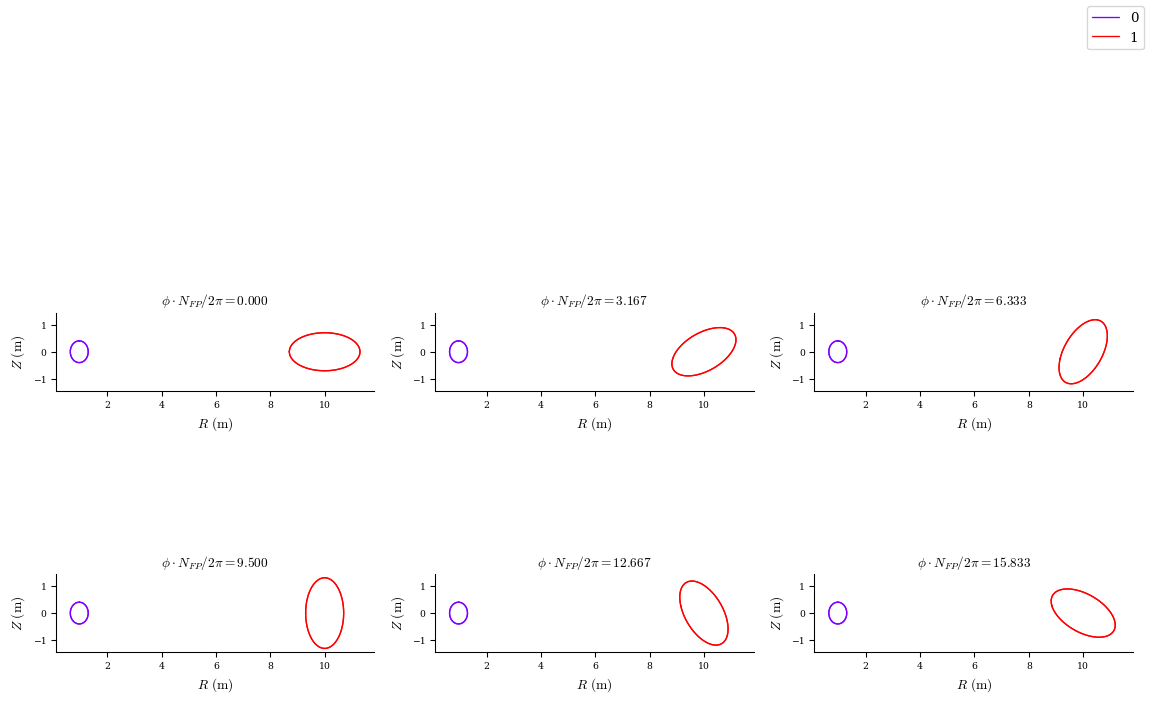

In [2]:
eq = get("HELIOTRON")
surf = FourierRZToroidalSurface(
    R_lmn =   [0.97, 0.33],
    modes_R = [(0, 0), (-1, 0)],
    Z_lmn =   [0.4],
    modes_Z = [(1, 0)],
)

# However, error occurs for some Equilibrium and Surface.
plot_comparison([surf, eq], rho=np.array(1.0), theta=0);